**This kernel downloads Keras IMDB dataset and trains LSTM to do sentimental analysis.**

In [3]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

## Load IMDB from Keras dataset

In [4]:
# Vocabulary size is 2000
num_words = 2000
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=num_words,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\shakt\.conda\envs\tf_env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\shakt\.conda\envs\tf_env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprec

## Pad the sequence to the same length

In [5]:
max_review_length = 250
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

## Create and compile model

In [6]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_vector_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 32)           64000     
_________________________________________________________________
dropout (Dropout)            (None, 250, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 256)               8448      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 81,025
Trainable params: 81,025
Non-trainable params: 0
____________________________________________________

## Fit model

In [7]:
train_history = model.fit(X_train, y_train, batch_size=32,
                          epochs=10, verbose=2,
                          validation_split=0.2)

Epoch 1/10
625/625 - 11s - loss: 0.4425 - accuracy: 0.7856 - val_loss: 0.3479 - val_accuracy: 0.8518
Epoch 2/10
625/625 - 7s - loss: 0.3196 - accuracy: 0.8639 - val_loss: 0.3204 - val_accuracy: 0.8630
Epoch 3/10
625/625 - 7s - loss: 0.2873 - accuracy: 0.8806 - val_loss: 0.3141 - val_accuracy: 0.8718
Epoch 4/10
625/625 - 7s - loss: 0.2731 - accuracy: 0.8866 - val_loss: 0.3306 - val_accuracy: 0.8590
Epoch 5/10
625/625 - 7s - loss: 0.2458 - accuracy: 0.8997 - val_loss: 0.3158 - val_accuracy: 0.8704
Epoch 6/10
625/625 - 7s - loss: 0.2373 - accuracy: 0.9053 - val_loss: 0.3520 - val_accuracy: 0.8686
Epoch 7/10
625/625 - 7s - loss: 0.2218 - accuracy: 0.9111 - val_loss: 0.3261 - val_accuracy: 0.8690
Epoch 8/10
625/625 - 7s - loss: 0.2112 - accuracy: 0.9172 - val_loss: 0.3388 - val_accuracy: 0.8718
Epoch 9/10
625/625 - 7s - loss: 0.1923 - accuracy: 0.9234 - val_loss: 0.4118 - val_accuracy: 0.8632
Epoch 10/10
625/625 - 7s - loss: 0.1823 - accuracy: 0.9293 - val_loss: 0.3477 - val_accuracy: 0.859

## Show train and validation history: loss and accuracy

In [8]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

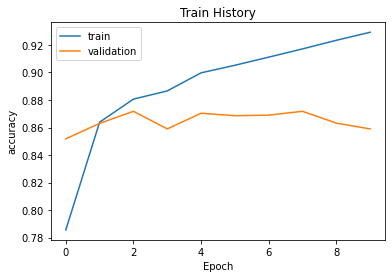

In [11]:
show_train_history(train_history,'accuracy','val_accuracy')

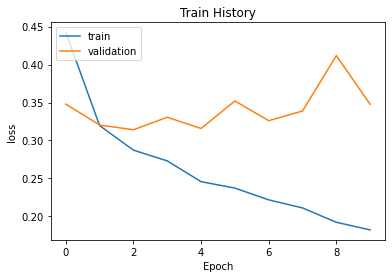

In [12]:
show_train_history(train_history,'loss','val_loss')

## Evaluate model by test set

In [13]:
scores = model.evaluate(X_test, y_test, verbose=1)
scores[1]

782/782 [==============================] - 4s 6ms/step - loss: 0.3530 - accuracy: 0.8604


0.8603600263595581

## Predict test data

In [14]:
predict=model.predict_classes(X_test)
predict_classes=predict.reshape(len(X_test))

C:\Users\shakt\.conda\envs\tf_env\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [15]:
def get_original_text(i):
    word_to_id = imdb.get_word_index()
    word_to_id = {k:(v+3) for k,v in word_to_id.items()}
    word_to_id["<PAD>"] = 0
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2

    id_to_word = {value:key for key,value in word_to_id.items()}
    return ' '.join(id_to_word[id] for id in X_test[i])

In [16]:
SentimentDict={1:'positive', 0:'negative'}
def display_test_sentiment(i):
    print(get_original_text(i))
    print('label: ', SentimentDict[y_test[i]], ', prediction: ', SentimentDict[predict_classes[i]])

In [17]:
display_test_sentiment(3)

1646592/1641221 [==============================] - 1s 0us/step
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just <UNK> about it this was absolutely <UNK> the things that happen with the dead kids are very cool but the alive people are absolute <UNK> i am a <UNK> man pretty big and i can <UNK> myself well however i would not do half the stuff the little girl does in this movie also the mother in this movie is <UNK> with her children to the point of <UNK> i wish i wasn't so angry about her and h

In [18]:
display_test_sentiment(13000)

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> this film brought me to tears i have to say that if i did not have a beautiful husband at home i would ask this beautiful piece of art to <UNK> me <UNK> <UNK> gives a <UNK> performance as a confused young pop star while <UNK> <UNK> <UNK

In [20]:
X_train.shape

(25000, 250)

In [23]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 32)           64000     
_________________________________________________________________
dropout (Dropout)            (None, 250, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 256)               8448      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 81,025
Trainable params: 81,025
Non-trainable params: 0
____________________________________________________

In [26]:
import tensorflow as tf
import numpy as np
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Embedding(1000, 64, input_length=10))
model.add(tf.keras.layers.LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
# The model will take as input an integer matrix of size (batch,  
# input_length), and the largest integer (i.e. word index) in the input  
# should be no larger than 999 (vocabulary size).  
# Now model.output_shape is (None, 10, 64), where `None` is the batch  
# dimension.  



(32, 10, 64)


In [29]:
input_array = np.random.randint(1000, size=(32, 10))
print(input_array.shape)
model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
print(output_array.shape)

(32, 10)
(32, 10, 64)


In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))

In [36]:
input_array = np.random.randint(10000, size=(1200, 50))

In [37]:
input_array.shape

(1200, 50)

In [38]:
train_X = input_array.reshape((input_array.shape[0], -1, input_array.shape[1]))

In [39]:
train_X.shape

(1200, 1, 50)

In [45]:
train_X[0]

array([[7492, 9141, 1948, 1519, 6888, 5822, 2264, 8953,  438, 5413, 3097,
        8564, 6476, 7767, 6828, 4797, 6238, 8482, 8540, 4339, 5106, 3243,
        5055, 6264, 5559, 5041, 2495, 7718, 3443, 3754, 1769, 2617, 8545,
        3093, 9351, 9190, 5972, 8186, 5896, 2208, 1324, 3041, 9525, 2405,
        8845, 6753, 7889, 1023,    4, 2500]])